# Anpassung und lineare Regression

Bei der Kurvenanpassung handelt es sich um ein statistisches Analyseverfahren zur Feststellung funktionaler Beziehungen zwischen einer abhängigen und einer oder mehreren unabhängigen Variablen. Der Begriff **lineare Regression** ist weit verbreitet, doch dies ist nur der einfachste Fall eines Modells, nämlich der einer Geraden: $y = a \cdot x +b$. Grundsätzlich sollte man den Typ der Fit-Funktion $y = f(x)$ immer vorher festlegen und auch begründen können. Es ist keine wissenschaftlicher oder messtechnische Vorgehensweise alle möglichen Funktionen nur auf Verdacht *auszuprobieren* und sich für die besten entscheiden. Hierbei wäre es möglich, dass unbrauchbare Näherungen pder sogar falsche (unsinnige) und nicht-wissenschaftlicher Ergebnisinterpretationen auftreten könnten, was es zu vermeiden gilt. 

Zusammengefasst suchen wir nun also ein bestimmtes Modell für ein bestimmtes Set an Daten und wollen die Modellparameter bestimmen. Dabei soll das Modell möglichst gut die Messdaten vorhersagen. Die Modellanpassung wird häufig über die Methode der kleinsten Quadrate verwendet, mit welcher sich fast alle Messdaten modellieren lassen (auch kompliziertere Situationen wie beispielsweise korrelierte Unsicherheiten). 

:::{admonition} Tutorial
:class: tip
Python-Beispiele für Kurvenanpassungen findet ihr hier:
* [Vergleich verschiedener Fit-Routinen in Python](T_LinReg)
* [Fitten mit Fehlerbalken in Python](T_FitmitFehlerbalken)
* [Fitten von *echten* Klimadaten](T_Plotten)
:::

## Modellanpassung <a id="Sec-Modellanpassung"></a>

Um ein Regressionsmodell zu berechnen, benötigen wir ein objektives Maß um die Zuverlässigkeit und Güte unsere Modellfunktion zu bestimmen. Dies nennt man auch das **Bestimmtsheitsmaß**, bzwl. auf englisch **coefficient of determination** oder **goodness of fit**. Dieses Maß 
* bestimmt die Verkleinerung des Vorhersagefehlers der Ausgangsgröße $y$
* definiert die Größe der Streuung von $y$
* zeigt die Qualität der linearen Regression, aber nicht ob das Modell richtig ist
* sagt nichts über die statistische Signifikanz des ermittelten Zusammenhangs der einzelnen Regressoren aus (Signifikanztest notwendig)

Als erstes soll überprüft werden, inwiefern die Funktion oder das Modell mit den Messdaten übereinstimmt. Ausgangspunkt ist also unsere Messreihe mit $N$ Messpunkten $(x_i, y_i)$ und wir haben eine Funktion $f(x_i)$ definiert, die die Messwerte $y_i$ möglichst gut vorhersagen soll. In der unteren Grafik (geborgt von [Wikipedia](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)), sind Messpunkte in blau und eine Modellfunktion in rot aufgezeichnet. Die Parameter der gesuchten Modellfunktion werden nun so bestimmt, dass die Modellfunktion möglichst wenig von den Messwerten abweicht, d.h. das Residuum 

$$\epsilon = \left( f(x_i) - y_i\right)$$

soll möglichst klein werden. 

<Figure size 600x300 with 0 Axes>

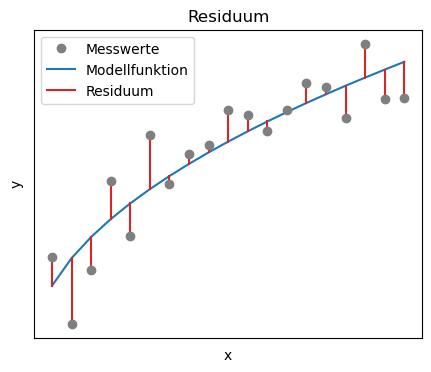

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(6,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

plt.figure(figsize=(5,4)) # Plot-Größe

# ANPASSUNG:
x = np.arange(10, 200, 10)
stoerung = np.random.normal(scale=1.4, size=x.shape)
y = np.sqrt(x)+stoerung
plt.plot(x,y,'o', color='tab:gray', zorder=3)

# Anpassung / Fit:
def anpassung(x, a):
    return a*np.sqrt(x)
popt, pcov = curve_fit(anpassung, x, y)
plt.plot(x,anpassung(x,*popt), zorder=0, color = 'tab:blue')
plt.plot((x,x),([i for i in y], [j for (j) in anpassung(x,*popt)]),c='tab:red', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([])
plt.yticks([])
plt.title('Residuum')
plt.legend(['Messwerte', 'Modellfunktion', 'Residuum'])
plt.show()

### Least-Squares: Methode der kleinsten Quadrate <a id="SubSec-least_squares"></a>

Laut Carl Friedrich Gauß kann also der Abstand der Funktionswerte zu den Messwerten wievolgt definiert werden:

> Methode der Gauß'schen Fehlerquadrate (Gütefunktion): 

$$Q := \sum_{i=1}^N \left( f(x_i) - y_i\right)^2 :=  \sum_{i=1}^N \epsilon_i^2 = \mathrm{min!}$$

Die Gütefunktion, die gleichbedeutend mit den SQT ist, ist wieder so gewählt, dass sich Abweichungen aufgrund unterschiedliche Vorzeichen nicht aufheben können und dass größere Abweichungen stärker gewichtet werden (durch die Quadrierung). Die Modellfunktion $f(x)$ wird bestimmt, indem das Minimierungsproblem gelöst wird. Dies kann entwedet analytisch geschehen (siehe [Lineare Modellanpassung](#SubSec-Lineare_Modellanpassung)) oder man lässt sich die Regression mittels Software berechnen. 

Es handelt sich um ein *Minimierungsproblem* welches je nach Art der Modellfunktion unterschiedlich gelöst wird. Man sollte stets die Regressionsgerade zusammen mit den Datenpunkten in ein Diagramm zeichnen, um zu sehen, wie "gut" die Messdaten durch die Kurvenanpassung beschrieben werden. 
Je enger die Datenpunkte um die Regressionsgerade herum konzentriert sind, d. h. je kleiner also die Residuenquadrate sind, desto „besser“. Die Residuenquadrate sind meistens relativ klein, insbesondere dann, wenn die abhängige Variable sehr konstant ist. Das heißt man möchte eigentlich auch die Streuung der abhängigen Variablen mit ins Spiel bringen.
Sowohl die Streuung der Messwerte zum Mittelwert, als auch die der geschätzten Werte, sollte in Relation zueinander gebracht werden. Das heißt wir definieren im Folgenden zwei Summen der Abweichungsquadrate. Die **Summe der Abweichungsquadrate (Sum of Squares) SQT oder SST** gibt die Streuung der Messwerte um ihren Mittelwert an. Das *mittlere* Abweichungsquadrat bestimmt deren Varianz. 

* Die **Summe der Quadrate der Erklärten Abweichungen (Sum of Squares Explained) SQE oder SSE** gibt die Streuung der Schätzwerte $f(x_i)$ des Fits um den Mittelwert $\bar f = \bar y$ der gemessenen Messwerte an:

$$\mathrm{SQE} = \mathrm{SSE} = \sum_{i=1}^N (f(x_i) - \bar y)^2$$

* Die **totale Quadratsumme (Summe der Quadrate der Totalen Abweichungen bzw. Sum of Squares Total) SQT oder SST** gibt die Streuung der Messwerte $y_i$ um deren Mittelwert $\bar y$ an:

$$\mathrm{SQT} = \mathrm{SST} = \sum_{i=1}^N (y_i - \bar y)^2$$

* Die **Restabweichungen** (nicht erklärte Abweichungen), welche nach der Regression übrig bleiben sind ein Maß für die Abweichung der Datenpunkte von der Regressionskurve und werden durch die Residuenquadratsumme (**Summe der Quadrate der Restabweichungen** (oder: „Residuen“) bzw. englisch Sum of Squares Residual) SQR oder SSR) erfasst:

$$\mathrm{SQR} = \mathrm{SSR} = \sum_{i=1}^N(y_i-f(x_i))^2$$

* Man kann beweisen, dass folgendes gilt:

$$\mathrm{SQT} = \mathrm{SQR} + \mathrm{SQE}$$

### Bestimmtheitsmaß <a id="SubSec-Bestimmtheitsmaß"></a>

Für das **Bestimmtheitsmaß** gelten folgenden Punkte:
* Es beschreibt den Anteil der Varianz einer abhängigen Variablen $y$ durch ein statistisches Modell
* Es ist nur für lineare Regressionen eindeutig definiert:

$$\mathit{R}^2 = r^2 (=\textrm{Korrelation}^2)$$

* Es kann bedingt zur Beschreibung der Güte einer Regression verwendet werden. 

* Das Verhältnis der beiden Größen SQE und SQT wird das **Bestimmtheitsmaß** der Regression genannt und gibt an, wie gut die gefundene geschätzte Modellfunktion zu den Messdaten passt, oder wie gut sich die Regression an die Daten annähert. 

$$\mathit{R}^2 \equiv \frac{SQE}{SQT}=
\frac{\displaystyle\sum_{i=1}^N \left(f(x_i)- \overline{y}\right)^2}{\displaystyle\sum_{i=1}^N \left(y_i - \overline{y}\right)^2} = 1 - \frac{SQR}{SQT}=1-\frac{\displaystyle\sum_{i=1}^N \left(y_i - f(x_i)\right)^2}{\displaystyle\sum_{i=1}^N \left(y_i - \overline{y}\right)^2}$$

wobei:
* $f(x_i)$ der Funktionswert der Regression ist
* $x_i$ der Datenwert ist
* und $\bar y$ der Mittelwert $y_i$ der Messwerte ist

Das Bestimmtheitsmaß lässt sich mit 100 multiplizieren, um es in Prozent anzugeben, dies entspricht dann dem prozentualen Anteil der Streuung in $y$, der durch das lineare Modell beschrieben wird und liegt somit zwischen 0% und 100%:
* 0%: es existiert kein linearer Zusammenhang
* 100%: perfekter linearer Zusammenhang

Allgemein gilt für das Bestimmheitsmaß:
* je näher $\mathit{R}^2$ an 1 liegt, desto höher ist die Güte der Kurvenanpassung
* für $\mathit{R}^2=0$ ist der Schätzer im Modell völlig unbrauchbar für irgendeine Vorhersage eines Zusammenhangs zwischen $x_i$ und $y_i$. 
* für $\mathit{R}^2=1$ lässt sich $y$ vollständig durch ein lineares Modell beschreiben und alle Messpunkte liegen auf einer nicht-horizontalen Geraden. In diesem Falle würde man davon sprechen, dass ein deterministischer Zusammenhang besteht, kein stochastischer. 

**Nachteile des Bestimmheitsmaß:**
Für immer mehr Messwerte steigt $\mathit{R}^2$ an, ohne dass die Korrelation oder die Regression besser wird.
Dies könnte durch ein korrigiertes $\mathit{R}^2$ behoben werden:
    
$$\mathit{\overline R}^2 = 1-(1-\mathit{R}^2)\cdot \frac{n-1}{n-p-1}$$

mit 
* $n$ Anzahl der Messwerte und
* $p$ Anzahl der Variablen im Regressionsmodell

Ein weiterer Nachteil ist, dass keine Aussage darüber geliefert werden kann, ob ein *korrektes* Regressionsmodell verwendet wurde.

### Berücksichtigung von Unsicherheiten <a id="SubSec-Modellanpassung_unsicherheiten"></a>

Im allgemeinen Fall, d.h. wenn die Messwerte $y_i$ mit Unsicherheiten $s_i$ behaftet sind, lässt sich die Residuensumme wiefolgt definieren:

$$\chi^2 = \sum_{i=1}^N \left(\frac{f(x_i)-y_i}{s_i}\right)^2$$

Für die obigen Berechnungen, und auch im Falle von konstanten Unsicherheiten, d.h. wenn für alle Werte von $y_i$ die gleiche absolute Unsicherheit existiert, ändert sich nichts. Denn es gilt $s_i = s = \mathrm{const}$ und beim "Nullsetzen" werden diese einfach eliminiert.
Gelten für die $N$ Messwerte allerdings unterschiedliche Unsicherheiten, so müssen diese miteinbezogen werden. 

## Lineare Modellanpassung <a id="SubSec-Lineare_Modellanpassung"></a>

Da wir als Messtechniker immer danach streben möglichst lineare Kennlinien zu erreichen, ist die Gerade eine häufig auftretende Kurve, die angepasst werden soll. Daher wollen wir uns in diesem Abschnitt mit der Herleitung der linearen Regression befassen. Die Herleitung für andere Modellfunktionen, welche quadratische Terme, noch höhere Terme oder ganz andere Zusammenhänge beinhalten, ist auch deutlich schwieriger.

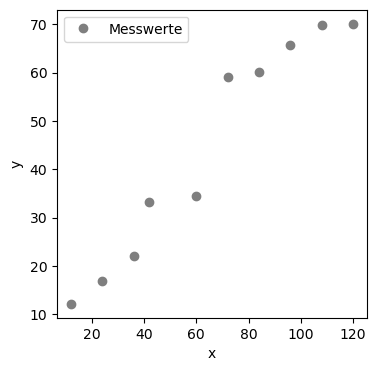

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(4,4)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

x = [12, 24, 36, 42, 60, 72, 84, 96, 108, 120] # Messwerte der Strecke x in m
y = [12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1] # Messwerte der Zeit t in sek.
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array
y = np.array(y) #konvertiere die Messwerte in ein Numpy-Array

plt.plot(x,y, 'o', label = 'Messwerte', ms=6, color="tab:gray")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Unser Ausgangspunkt ist also eine Gerade der Form 

$$f(x) = mx + b$$

Die Parameter $m$ und $b$ werden nun durch das Minimierungsproblem bestimmt mithilfe der Gütefunktion, die nun wiefolgt geschrieben werden kann:

$$Q = \sum_{i = 1}^{N} (y_i - f(x_i))^2 = \sum_{i = 1}^{N} (y_i - mx_i - b)^2 = \mathrm{min!}$$

wobei $y_i$ und $x_i$ die Messwerte (Datenpunkte) sind. 

Durch Differentation nach den Parametern und gleichsetzen auf Null können die Parameter bestimmt werden:

$$\frac{dQ}{dm} = -2 \sum_{i = 1}^{N} x_i (y_i - mx_i - b) = 0$$

$$\frac{dQ}{db} = -2 \sum_{i = 1}^{N} (y_i - mx_i - b) = 0$$

Nach Umstellen der beiden Ableitungen gelangt man zu folgenden Gleichungssystem:

$$m\sum_{i = 1}^{N} x_i^2 + b\sum_{i = 1}^{N}x_i  = \sum_{i = 1}^{N}x_i y_i$$

$$m\sum_{i = 1}^{N} x_i + N b  = \sum_{i = 1}^{N} y_i$$

Auflösen nach den gesuchten Parameter erhält man folgende Gleichungen für die gesuchten besten Schätzparamete der Regressionsgeraden, auch **Regressionskoeffizienten** genannt:

$$ m = \frac{\sum_{i=1}^N (x_i y_i) - b\sum_{i=1}^N x_i }{\sum_{i=1}^N x_i^2 } = \frac{S_{xy}}{S_{x}^2} = \frac{\overline{x\cdot y} - \overline x \cdot \overline y}{\overline{x^2} - (\overline x)^2}$$

$$b = \frac{\sum_{i=1}^N y_i - m \sum_{i=1}^N x_i}{N} = \bar y - m \cdot \bar x$$

mit folgenden Definitionen:

> $\bar x = \sum_{i = 1}^N x_i$

> $\bar y = \sum_{i = 1}^N y_i$

> $S_{xy} = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)(y_i - \bar y)$

> $S_{x}^2 = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)^2$

Wir sind hier in der verrückten Situation, dass tatsächlich  Mittelwerte für $x$ und $y$ bestimmt werden müssen, obwohl die $x$-Werte absichtlich während der Versuchsreihe verändert werden, sich also die Grössen $x$ und $y$ laufend ändern.

Die Steigung ist 		 m = 0.6067 s/m
Der Ordinatenabschnitt ist 	 b = 4.7148 s


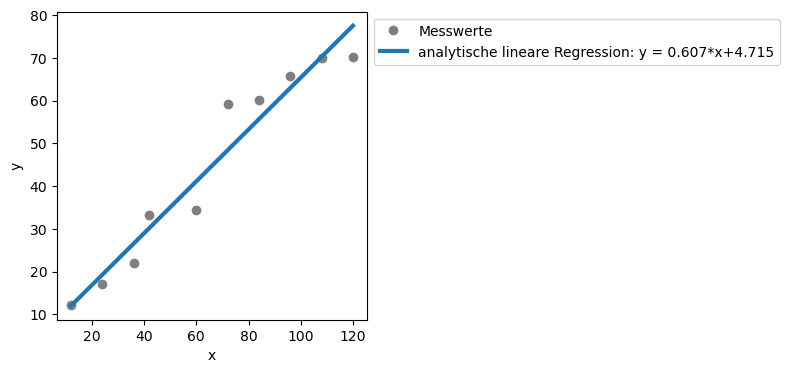

In [3]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(4,4)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

m = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
b = np.mean(y) - m * np.mean(x)
print('Die Steigung ist \t\t m = %5.4f s/m' %(m))
print('Der Ordinatenabschnitt ist \t b = %5.4f s' %(b))

plt.plot(x,y, 'o', label = 'Messwerte', ms=6, color="tab:gray")
plt.plot(x,m*x+b,lw=3, color="tab:blue", label = 'analytische lineare Regression: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

Nun sind die Schätzwerte allerdings zusätzlich fehlerbehaftet (wie sollte es auch anders sein). Mithilfe der Gleichung der Größtfehlers/Maximalfehlers kann man zeigen (den Beweis überspringen wir hier), dass für den Fehler von $y$ folgendes gilt:

$$s_y = \sqrt{\frac{1}{N-2}\sum(y_i - mx_i - b)^2 }$$

In [4]:
N = len(y)
diff_y = 0
for i in range(N):
    diff_y += ( y[i] - m * x[i] - b )**2

streuung_y = 1/(N-2)*diff_y
s_y = np.sqrt(streuung_y)
print('Die Unsicherheit von y ist \t s_y = %5.4f s' %(s_y))

Die Unsicherheit von y ist 	 s_y = 5.8831 s


Die ist auch die Standardabweichung der Einzelmessung aber *nicht* der Fehlerbalken, der im Diagramm als Fehlerbalken eingezeichnet wird. Die Abweichung der Einzelmessung wurde bisher mit $N-1$ definiert, damals hat es sich aber um die Abweichung vom *Mittelwert* gehandelt. Nun betrachten wir die Abweichung zu einem linearen Modell, welches 2 offene Parameter, $m$ und $b$, hat, und somit einen Freiheitsgrad mehr bestitzt. Erst ab 3 Messwertepaaren können also Fehler für Steigung und Achsenabschnitt berechnet werden.
Die besten Schätzwerte für die Abweichungen von $m$ und $b$ können nun wiefolgt berechnet werden. Der Fehler der Geradensteigung beträgt:

$$s_m = s_y \cdot \sqrt{\frac{N}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{\sum x_i^2 - N\cdot \bar x^2}} = s_y \cdot \sqrt{\frac{1}{\sum \left(x_i - \bar x \right)^2}} = s_y \cdot \sqrt{\frac{1}{N\cdot (\overline{x^2} - (\overline x)^2)}}$$

In [5]:
s_m = s_y * np.sqrt(1 / (N*(np.mean(x**2) - np.mean(x)**2)))
print('Die Unsicherheit von m ist \t s_m = %5.4f s/m' %(s_m))

Die Unsicherheit von m ist 	 s_m = 0.0534 s/m


Der Fehler des Ordinatenabschnitts beträgt:

$$s_b = s_y \cdot \sqrt{\frac{\sum x_i^2}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum x_i^2 - N\cdot \bar x^2}} = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum \left(x_i - \bar x \right)^2}} = s_m \cdot \sqrt{\overline{x^2}}$$

In [6]:
s_b = s_m * np.sqrt(np.mean(x**2))
print('Die Unsicherheit von b ist \t s_b = %5.4f s' %(s_b))

Die Unsicherheit von b ist 	 s_b = 3.9581 s


### Korrelationskoeffizient <a id="SubSec-Korrelationskoeffizient"></a>

Für lineare Zusammenhänge ist es häufig sinnvoll den Korrelationskoeffizient zu berechnen:
    
$$r = \frac{\overline{x\cdot t} - \overline x \cdot \overline t}{\sqrt{\overline{x^2} - (\overline x)^2} \cdot {\sqrt{\overline{t^2} - (\overline t)^2}}} $$    

In [7]:
# Analytische Methode:
r = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.sqrt(np.mean(x**2) - np.mean(x)**2) * np.sqrt(np.mean(y**2) - np.mean(y)**2))
print('Der Korrelationskoeffizient zwischen x und t beträgt: %5.8f\n'%(r))

# Python:
r = np.corrcoef(x, y)
print('Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:')
print(r)

Der Korrelationskoeffizient zwischen x und t beträgt: 0.97035603

Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:
[[1.         0.97035603]
 [0.97035603 1.        ]]


Der Korrelationskoeffizient von $+ 0,97035$ zeigt mit positivem Vorzeichen eine direkte Proportionalität zwischen $x$ und $t$. Die geringfügige Abweichung zu +1 zeigt, dass die Messwerte leicht von dem erwarteten linearen Zusammenhang dennoch abweichen.